# Deliverables

1. Code
2. .png files of each graph
3. .png file of the collated graphs
4. A sample of of the collated file pasted on a document then saved as a .pdf file.
5. Push everything to your github account.

In [5]:
import matplotlib.pyplot as plt

# Set global font and size
plt.rcParams['font.family'] = 'Arial'   # Change to any preferred font
plt.rcParams['font.size'] = 12          # Adjust font size
plt.rcParams['axes.titlesize'] = 12     # Title font size
plt.rcParams['axes.labelsize'] = 12     # Axis label size
plt.rcParams['xtick.labelsize'] =12    # X-axis tick label size
plt.rcParams['ytick.labelsize'] = 12    # Y-axis tick label size

# Barplot

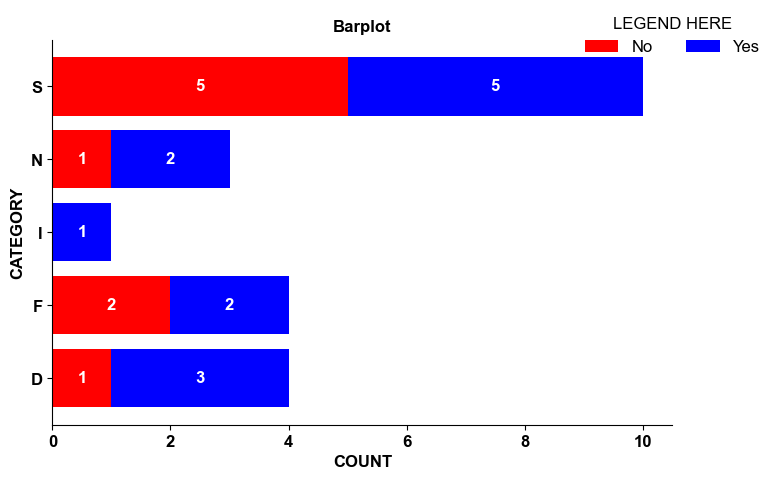

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "bar_assignment.csv"
df = pd.read_csv(file_path)

counts = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

counts.columns = ['No', 'Yes']

counts = counts.sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
y_labels = counts.index
yes_values = counts['Yes']
no_values = counts['No']

y_pos = np.arange(len(y_labels))

ax.barh(y_pos, no_values, color='red', label="No")
ax.barh(y_pos, yes_values, left=no_values, color='blue', label="Yes")

for i, (no, yes) in enumerate(zip(no_values, yes_values)):
    if no > 0:
        ax.text(no / 2, i, str(no), va='center', ha='center', color='white', fontsize=12, fontweight='bold')
    if yes > 0:
        ax.text(no + yes / 2, i, str(yes), va='center', ha='center', color='white', fontsize=12, fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)
ax.set_xticks(range(0, 11, 2))
ax.set_xlabel("COUNT", fontsize=12, fontweight='bold')
ax.set_ylabel("CATEGORY", fontsize=12, fontweight='bold')
ax.set_title("Barplot", fontsize=12, fontweight='bold')

legend = ax.legend(title="LEGEND HERE", loc="upper center", bbox_to_anchor=(1.0, 1.1), ncol=2, frameon=False)

ax.spines[['top', 'right']].set_visible(False)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')


plt.savefig("barplot.png", dpi=300, bbox_inches='tight')
plt.show()


# Sankey Plot

In [3]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("sankey_assignment.csv")

sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middles = ['S', 'F', 'D', 'N', 'I']
targets = ['Reg', 'Aca', 'Oth']

nodes = {name: i for i, name in enumerate(sources + middles + targets)}

links = []
for src in sources:
    for mid in middles:
        value = df[df["LABEL"] == mid][src].values[0]
        if value > 0:
            links.append((src, mid, value))

for mid in middles:
    for tgt in targets:
        value = df[df["LABEL"] == mid][tgt].values[0]
        if value > 0:
            links.append((mid, tgt, value))

source_indices = [nodes[src] for src, tgt, val in links]
target_indices = [nodes[tgt] for src, tgt, val in links]
values = [val for src, tgt, val in links]

custom_colors = {
    'OMP': 'rgb(0, 128, 128)',  # Teal
    'PS': 'rgb(255, 165, 0)',   # Orange
    'CNP': 'rgb(255, 69, 0)',   # Red-Orange
    'NRP': 'rgb(255, 20, 147)', # Deep Pink
    'NMCCC': 'rgb(255, 255, 0)',# Yellow
    'PEC': 'rgb(144, 238, 144)',# Light Green
    'NCDM': 'rgb(0, 255, 255)', # Cyan
    'RGS': 'rgb(0, 128, 0)',    # Green
    'S': 'rgb(173, 216, 230)',  # Light Blue
    'F': 'rgb(0, 0, 128)',      # Navy
    'D': 'rgb(0, 100, 0)',      # Dark Green
    'N': 'rgb(0, 0, 255)',      # Blue
    'I': 'rgb(135, 206, 250)',  # Sky Blue
    'Reg': 'rgb(0, 255, 127)',  # Spring Green
    'Aca': 'rgb(0, 191, 255)',  # Deep Sky Blue
    'Oth': 'rgb(34, 139, 34)'   # Forest Green
}

fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=25,
        line=dict(color="black", width=1),
        label=list(nodes.keys()),
        color=[custom_colors[name] for name in nodes.keys()]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=[custom_colors[tgt] for src, tgt, val in links] 
    )
))

fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(family="Arial", size=12, color="black"),
    title_font=dict(size=12, family="Arial", color="black"),
    height=650,
    paper_bgcolor="white",
)

fig.show()


# Network Plot

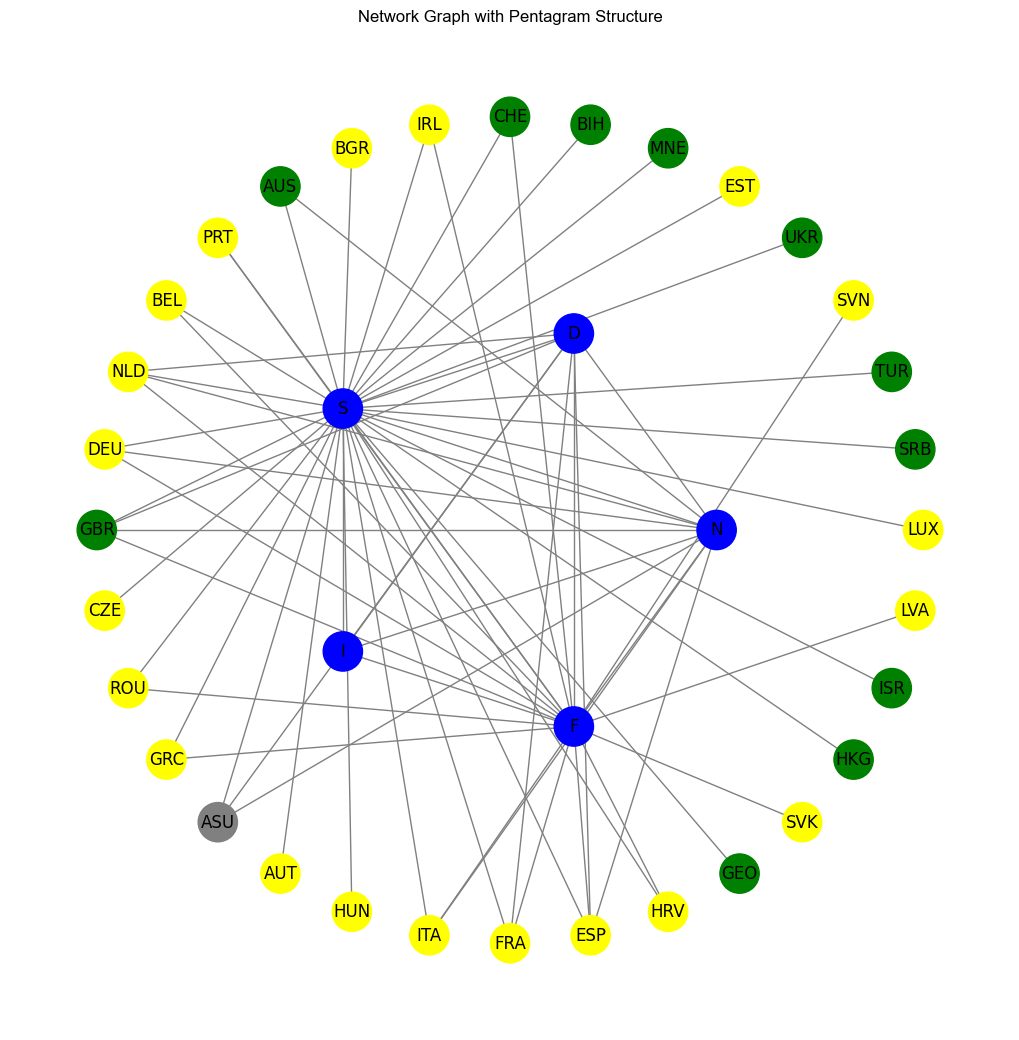

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the file
file_path = "networks_assignment.to_csv"  # Update this if needed
df = pd.read_csv(file_path)

# Define node groups and colors
pentagram_nodes = {'D', 'F', 'I', 'N', 'S'}
blue_nodes = pentagram_nodes
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
                'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

# Initialize the graph
G = nx.Graph()

# Add edges from the adjacency matrix
for i, row in df.iterrows():
    node = row['LABELS']
    for col in df.columns[1:]:  # Skip the LABELS column
        if row[col] > 0:  # If there is a connection
            G.add_edge(node, col, weight=row[col])

# Define positions for nodes
pos = {}
center_x, center_y = 0, 0  # Center for the pentagram
radius = 1.5  # Radius of the pentagram

# Arrange pentagram nodes
angles = np.linspace(0, 2*np.pi, 6)[:-1]  # Create 5 points on a circle
for node, angle in zip(pentagram_nodes, angles):
    pos[node] = (center_x + radius * np.cos(angle), center_y + radius * np.sin(angle))

# Arrange outer nodes in a circle around the pentagram
outer_radius = 3  # Larger radius for outer nodes
outer_nodes = set(G.nodes()) - pentagram_nodes
outer_angles = np.linspace(0, 2*np.pi, len(outer_nodes), endpoint=False)

for node, angle in zip(outer_nodes, outer_angles):
    pos[node] = (center_x + outer_radius * np.cos(angle), center_y + outer_radius * np.sin(angle))

# Assign colors to nodes
node_colors = []
for node in G.nodes():
    if node in blue_nodes:
        node_colors.append('blue')
    elif node in green_nodes:
        node_colors.append('green')
    elif node in yellow_nodes:
        node_colors.append('yellow')
    else:
        node_colors.append('gray')  # Default color for unspecified nodes

# Draw the network
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=800, font_size=12)

plt.title("Network Graph with Pentagram Structure")
plt.show()

# Collated Graphs


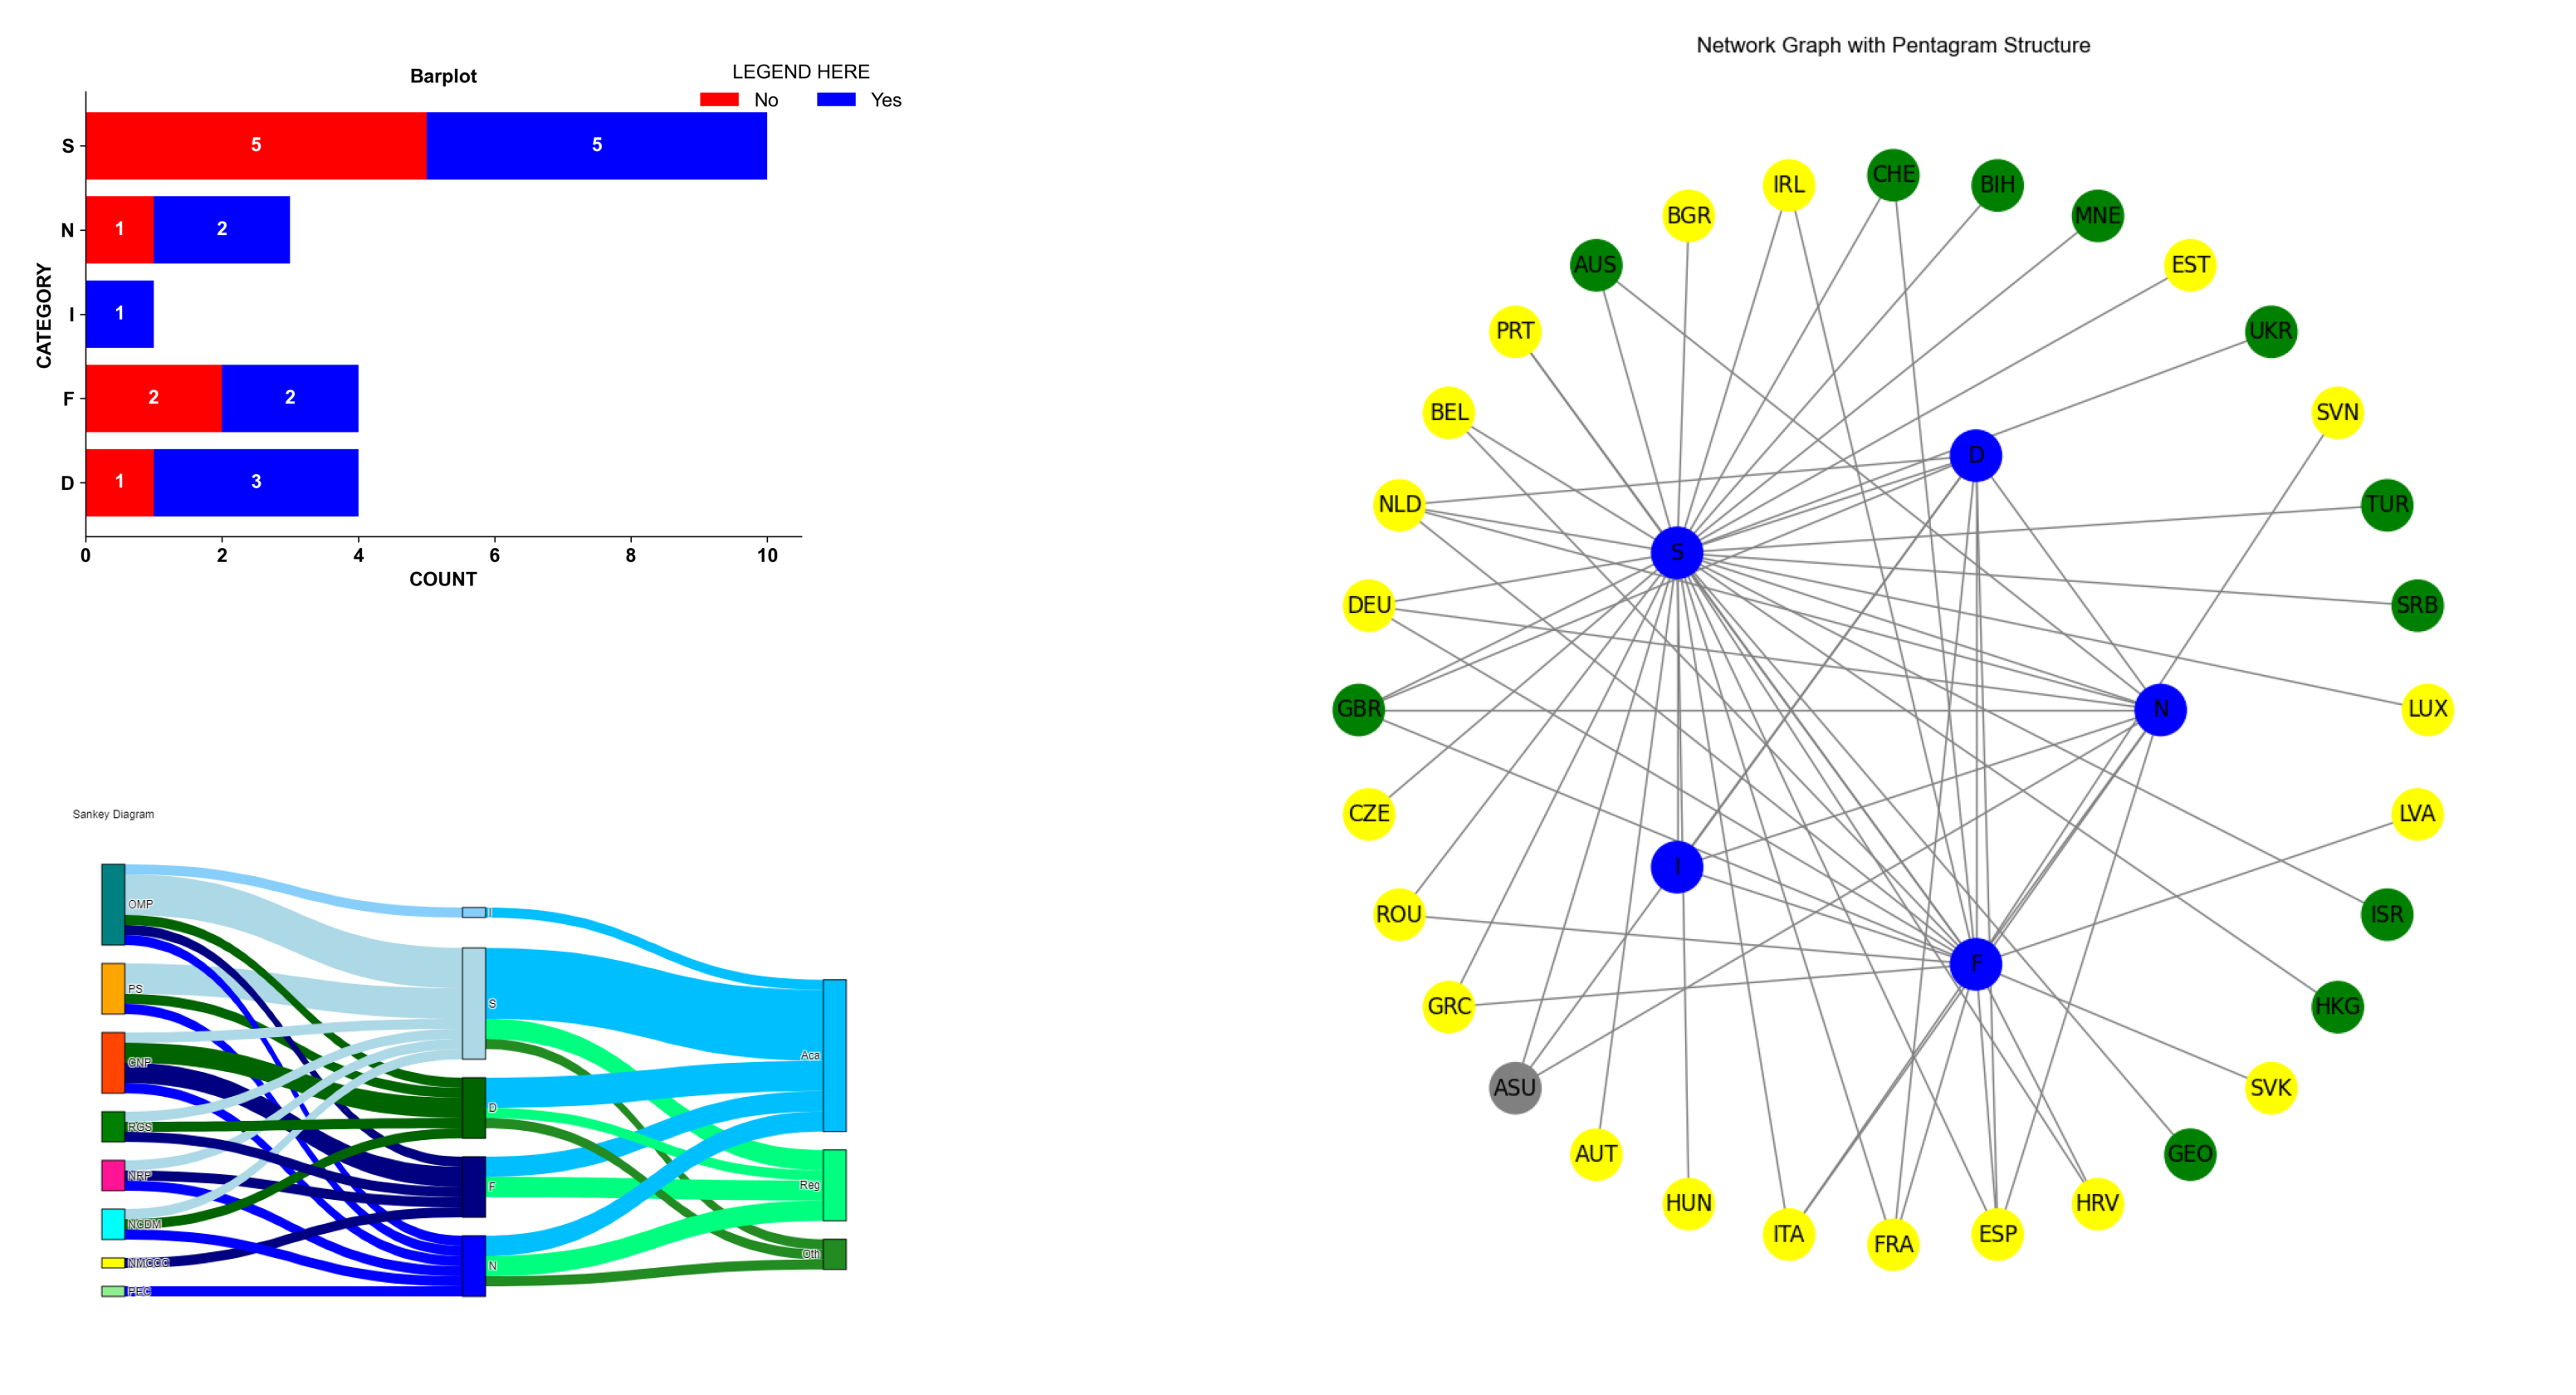

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
barplot_img = mpimg.imread("barplot.png")
sankey_img = mpimg.imread("sankeyplot.png")
network_img = mpimg.imread("networkplot.png")

# Create figure with high DPI
fig = plt.figure(figsize=(12, 6), dpi=300)

# Define exact axes positions without resizing images
ax1 = fig.add_axes([0.05, 0.55, 0.3, 0.4])  # Bar Chart (Top-left)
ax2 = fig.add_axes([0.05, 0.05, 0.3, 0.4])  # Sankey (Bottom-left)
ax3 = fig.add_axes([0.4, 0.05, 0.55, 0.9])  # Network Plot (Right, spanning two rows)

# Display images without resizing
ax1.imshow(barplot_img)
ax1.axis("off")  # Hide axes
ax2.imshow(sankey_img)
ax2.axis("off")  # Hide axes
ax3.imshow(network_img)
ax3.axis("off")  # Hide axes

# Show figure
plt.show()
